# Weather Vs Latitude
----


## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv"'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls



In [3]:
#set up list for each column in dataframe
City_name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lng=[]
Lat=[]
Max_Temp = []
Wind_speed=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    #set base URL
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    #set temp unit
    units = 'imperial'
    # Build query URL and request your results in Celsius
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_json = requests.get(query_url).json()
    try:
        City_name.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lng.append(weather_json['coord']['lon'])
        Lat.append(weather_json['coord']['lat'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_speed.append(weather_json['wind']['speed'])
        print(f'{city} is found')
    except:
        print('>CITY NOT FOUND!!!<')
        

puerto ayora is found
kruisfontein is found
yeniseysk is found
zhigansk is found
ostrovnoy is found
ancud is found
albany is found
clyde river is found
bluff is found
>CITY NOT FOUND!!!<
srednekolymsk is found
tura is found
northam is found
cidreira is found
arraial do cabo is found
saint-philippe is found
dulce nombre de culmi is found
new norfolk is found
kendrapara is found
linlithgow is found
priargunsk is found
ilulissat is found
bowen is found
fort nelson is found
khatanga is found
constitucion is found
mahebourg is found
bucerias is found
port lincoln is found
sao paulo de olivenca is found
ushuaia is found
aksu is found
hithadhoo is found
>CITY NOT FOUND!!!<
rikitea is found
san patricio is found
hilo is found
>CITY NOT FOUND!!!<
cape town is found
castro is found
vaini is found
cabo san lucas is found
venice is found
muroto is found
thompson is found
sao felix do xingu is found
longyearbyen is found
morondava is found
corozal is found
mar del plata is found
busselton is found


praia da vitoria is found
harper is found
>CITY NOT FOUND!!!<
saldanha is found
betare oya is found
umm kaddadah is found
mitsamiouli is found
kerman is found
alofi is found
zonguldak is found
maputo is found
piterka is found
manaure is found
kasongo-lunda is found
dickinson is found
ararat is found
yulara is found
terme is found
shenjiamen is found
>CITY NOT FOUND!!!<
torbay is found
komsomolskiy is found
mastic beach is found
tefe is found
green valley is found
basoko is found
aberystwyth is found
>CITY NOT FOUND!!!<
oksfjord is found
shiozawa is found
kununurra is found
neutraubling is found
thunder bay is found
belmonte is found
heihe is found
sept-iles is found
bonthe is found
jonava is found
>CITY NOT FOUND!!!<
camargo is found
oistins is found
dasoguz is found
ganzhou is found
casma is found
george town is found
thinadhoo is found
san cristobal is found
yiyang is found
tarakeswar is found
znamenskoye is found
>CITY NOT FOUND!!!<
>CITY NOT FOUND!!!<
>CITY NOT FOUND!!!<
mantua is 

### Convert Raw Data to DataFrame

In [83]:
weather_dict = {
    'City': City_name,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date': Date,
    'Humidity': Humidity,
    'Lng': Lng,
    'Lat': Lat,
    'Max Temp': Max_Temp,
    'Wind speed': Wind_speed 
}

weather_data = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header

weather_data.to_csv('../Data/cities.csv', index=False, header=True)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lng,Lat,Max Temp,Wind speed
0,Puerto Ayora,75,EC,1548867600,70,-90.35,-0.74,86.00,18.34
1,Kruisfontein,80,ZA,1548871477,87,24.73,-34.00,67.02,7.76
2,Yeniseysk,56,RU,1548871680,66,92.17,58.45,2.76,4.18
3,Zhigansk,0,RU,1548871978,0,123.37,66.77,-43.82,2.06
4,Ostrovnoy,88,RU,1548871635,86,39.51,68.05,8.43,18.05
5,Ancud,75,CL,1548867600,58,-73.83,-41.87,57.20,4.70
6,Albany,75,US,1548871020,35,-73.75,42.65,24.80,8.05
7,Clyde River,90,CA,1548867600,83,-68.59,70.47,-11.21,4.70
8,Bluff,68,AU,1548871979,77,149.07,-23.58,72.60,11.12
9,Srednekolymsk,24,RU,1548871979,0,153.71,67.46,-45.08,2.39


# Plotting the Data


#### Latitude vs. Temperature Plot

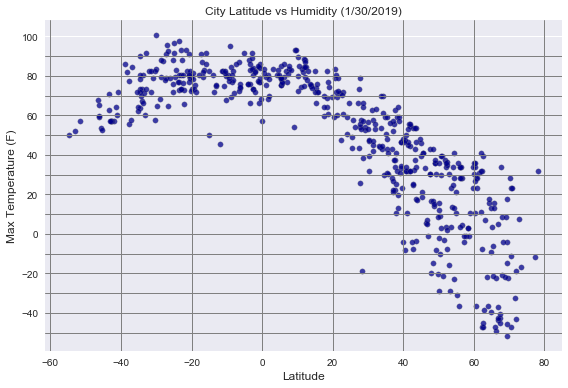

In [84]:

x = weather_data['Max Temp']

# plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 30, color = 'darkblue', edgecolor = 'grey', alpha = .75)


# Reference lines
for i in list(np.arange(-50, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
    
#Titles
plt.xlabel('Latitude', size=12)
plt.ylabel('Max Temperature (F)',size=12)
plt.title('City Latitude vs Humidity (1/30/2019)',size =12)
plt.tight_layout()


plt.savefig('../Images/max_temp.png')




#### Latitude vs. Humidity Plot

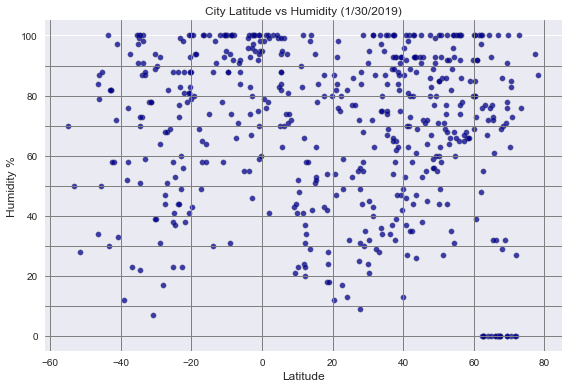

In [85]:

x = weather_data['Humidity']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 30, color = 'darkblue', edgecolor = 'grey', alpha = .75)

# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Humidity %',size=12)
plt.title('City Latitude vs Humidity (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("../Images/humidity.png")

#### Latitude vs. Cloudiness Plot

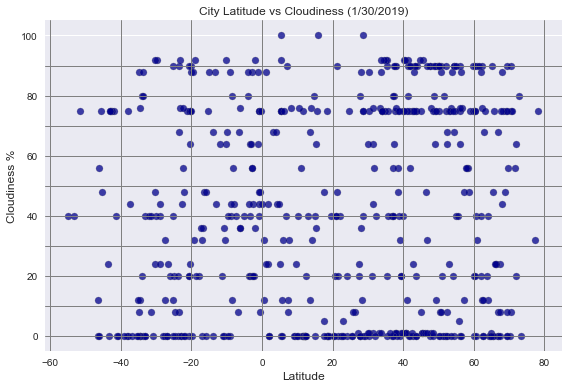

In [86]:

x = weather_data['Cloudiness']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 50, color = 'darkblue', edgecolor = 'grey', alpha = .75)


# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Cloudiness %',size=12)
plt.title('City Latitude vs Cloudiness (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("../Images/cloudiness.png")

#### Latitude vs. Wind Speed Plot

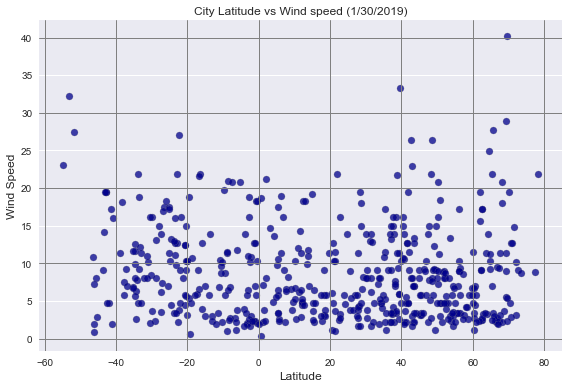

In [87]:

x = weather_data['Wind speed']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 50, color = 'darkblue', edgecolor = 'grey', alpha = .75)

# Reference lines
for i in list(np.arange(0, 50, 10)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='grey')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Wind Speed',size=12)
plt.title('City Latitude vs Wind speed (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("../Images/wind_speed.png")